In [1]:
from SoleOwner import *
from numpy.random import uniform
from matplotlib.animation import FuncAnimation
from IPython.display import HTML 

#### Trying the model

## Non-spatial tax

In [2]:
gammavary = 1
if gammavary == 1:
    gamma_1 = uniform(0,15)
    gamma_0 = 0
elif gammavary == 0:
    gamma_0 = uniform(0,15)
    gamma_1 = 0
gamma_1 = 0
function = lambda y,t: odesfnc(y,t,gamma_0 = gamma_0,gamma_1 = gamma_1)

In [8]:
t_end = 500
nt = 300000
sol_t = solve_model(function,t_end,nt,gamma_0,gamma_1)
sol = final_sol(sol_t)

Choice of gamma_0 = 0.00 
Choice of gamma_1 = 0.00 
Running model until t = 500 s
Solution in 2 s


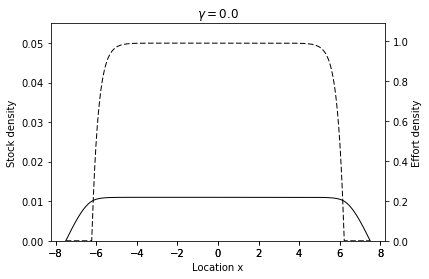

In [9]:

u = sol[0]
lt = sol[1]
f = f_so(u,lt,gamma_0,gamma_1)
effort_stock_plot(sol[0],f,gamma_1,5)

## Spatial tax

Choice of gamma_0 = 0.00 
Choice of gamma_1 = 0.00 
Running model until t = 10000 s
Initial conditions randomized
Solution in 4 s


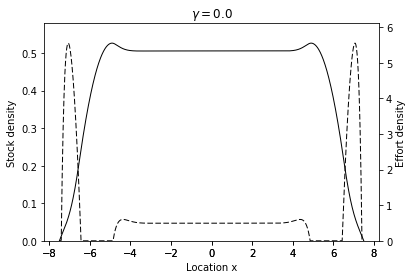

Choice of gamma_0 = 0.00 
Choice of gamma_1 = 0.25 
Running model until t = 10000 s
Initial conditions randomized
Solution in 23 s


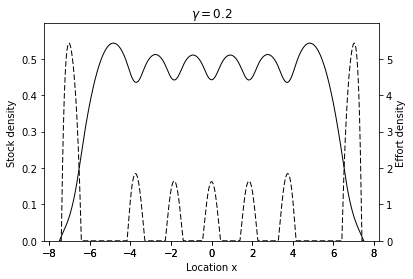

Choice of gamma_0 = 0.00 
Choice of gamma_1 = 1.00 
Running model until t = 10000 s
Initial conditions randomized
Solution in 16 s


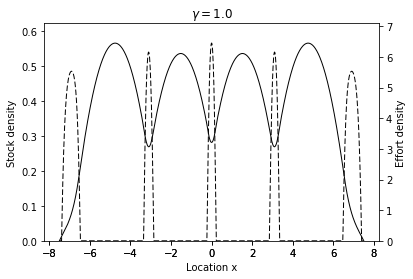

Choice of gamma_0 = 0.00 
Choice of gamma_1 = 9.00 
Running model until t = 10000 s
Initial conditions randomized
Solution in 34 s


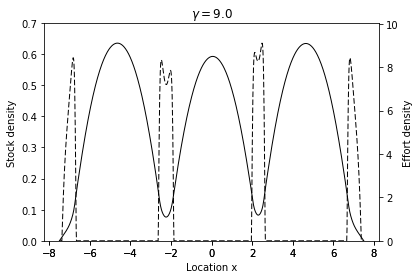

Choice of gamma_0 = 0.00 
Choice of gamma_1 = 15.00 
Running model until t = 10000 s
Initial conditions randomized
Solution in 51 s


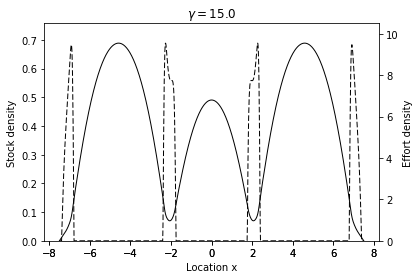

In [3]:
# case 3
gamma_0 = 0
gamma_1 = [0,0.25,1,9,15]
t_end = 10000
nt = 900000

for g in gamma_1:
    f = lambda y,t: odesfnc(y,t,gamma_0 = gamma_0,gamma_1 = g)
    sol = final_sol(solve_model(f,t_end,nt,gamma_0,g))
    f = f_so(sol[0],sol[1],gamma_0,g)
    effort_stock_plot(sol[0],f,g,1.1)

#### Convergence to solution

In [5]:
n_frames = nt
delay = t_end/n_frames*1000 #ms
fig = plt.figure()
ax = plt.axes(xlim = (-el/2, el/2), ylim = (0,1))
line, = ax.plot([], [], lw = 1)

ut = zeros((nt,x.size))
for i in range(0,nt):
    ut[i] = concatenate([[0],sol_t[i,:N-2],[0]])
    
def init():
    line.set_data([], [])
    return line,

def animate(i):
    y = ut[i]
    ax.set_title('Time %.2f s' % (i*delay/1000))
    ax.set_xlabel('Position')
    ax.set_ylabel('Stock density')
    line.set_data(x, y)
    return line,

In [6]:
anim = FuncAnimation(fig, animate, init_func=init,
                               frames = n_frames, interval = delay*100, blit=True)
HTML(anim.to_html5_video())

NameError: name 'fig' is not defined

#### Biomass

In [ ]:
b = biomass_analysis_1(0,15,10)

-Solving for gamma_1 = 0.0
Choice of gamma_0 = 0.00 
Choice of gamma_1 = 0.00 
Running model until t = 5000 s
Solution in 2 s
-Solving for gamma_1 = 1.7
Choice of gamma_0 = 0.00 
Choice of gamma_1 = 1.67 
Running model until t = 5000 s


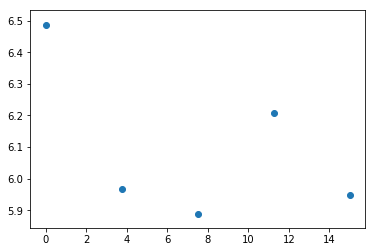

In [13]:
plt.scatter(b[0],b[1])
plt.show()